In [29]:
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [30]:
city_path = os.path.join('raw_data', 'city_data.csv')
ride_path = os.path.join('raw_data', 'ride_data.csv')

city_data = pd.read_csv(city_path)
ride_data = pd.read_csv(ride_path)
#city_data.head()

In [31]:
#ride_data.head(1)


In [32]:
# Your objective is to build a [Bubble Plot](https://en.wikipedia.org/wiki/Bubble_chart) that showcases the relationship between four key variables:

In [33]:
combined_data_df = pd.merge(city_data, ride_data, on="city", how="outer")
combined_data_df.head()



,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [34]:
# URBAN RIDE INFO

urban_data = combined_data_df.loc[combined_data_df["type"] == "Urban"]#.count()
urban_data = pd.DataFrame(urban_data)

urban_data.head()

urban_places = urban_data.groupby("city")

urban_fares_avg = urban_places['fare'].mean()
urban_fares_avg = pd.DataFrame(urban_fares_avg).reset_index()
#urban_fares_avg.head()

# * Total Number of Rides Per City
urban_rides = urban_places['ride_id'].count()
urban_rides = pd.DataFrame(urban_rides).reset_index()
#urban_rides.head()

# Total Number of Drivers

urban_drivers = urban_places['driver_count'].max()
urban_drivers = pd.DataFrame(urban_drivers).reset_index()
urban_drivers['driver_count'] = pd.to_numeric(urban_drivers['driver_count'])
#urban_drivers.head()

urban_merge = pd.merge(urban_fares_avg, urban_rides, on='city', how='outer')
#urban_merge.head()

urban_merge = pd.merge(urban_fares_avg, urban_rides, on='city', how='outer')
#urban_merge.head()

urban_merge2 = pd.merge(urban_merge, urban_drivers, on='city', how='outer')

urban_merge2.head()

,city,fare,ride_id,driver_count
0,Alvarezhaven,23.928710,31,21
1,Alyssaberg,20.609615,26,67
2,Antoniomouth,23.625000,22,21
3,Aprilchester,21.981579,19,49
4,Arnoldview,25.106452,31,41


In [39]:
# SUBURBAN RIDE INFO

suburban_data = combined_data_df.loc[combined_data_df["type"] == "Suburban"]#.count()
suburban_data = pd.DataFrame(suburban_data)

#suburban_data.head()

suburban_places = suburban_data.groupby("city")

suburban_fares_avg = suburban_places['fare'].mean()
suburban_fares_avg = pd.DataFrame(suburban_fares_avg).reset_index()
#suburban_fares_avg.head()

# * Total Number of Rides Per City
suburban_rides = suburban_places['ride_id'].count()
suburban_rides = pd.DataFrame(suburban_rides).reset_index()
#urban_rides.head()

# Total Number of Drivers

suburban_drivers = suburban_places['driver_count'].max()
suburban_drivers = pd.DataFrame(suburban_drivers).reset_index()
suburban_drivers['driver_count'] = pd.to_numeric(suburban_drivers['driver_count'])
#suburban_drivers.head()

suburban_merge = pd.merge(suburban_fares_avg, suburban_rides, on='city', how='outer')
#suburban_merge.head()

suburban_merge = pd.merge(suburban_fares_avg, suburban_rides, on='city', how='outer')
#urban_merge.head()

suburban_merge2 = pd.merge(suburban_merge, suburban_drivers, on='city', how='outer')

#suburban_merge2


In [40]:
# RURAL RIDE INFO

rural_data = combined_data_df.loc[combined_data_df["type"] == "Rural"]#.count()
rural_data = pd.DataFrame(rural_data)

#rural_data.head()

rural_places = rural_data.groupby("city")

rural_fares_avg = rural_places['fare'].mean()
rural_fares_avg = pd.DataFrame(rural_fares_avg).reset_index()
#rural_fares_avg.head()

# * Total Number of Rides Per City
rural_rides = rural_places['ride_id'].count()
rural_rides = pd.DataFrame(rural_rides).reset_index()
#urban_rides.head()

# Total Number of Drivers

rural_drivers = rural_places['driver_count'].max()
rural_drivers = pd.DataFrame(rural_drivers).reset_index()
rural_drivers['driver_count'] = pd.to_numeric(rural_drivers['driver_count'])
#rural_drivers.head()

rural_merge = pd.merge(rural_fares_avg, rural_rides, on='city', how='outer')
#rural_merge.head()

rural_merge = pd.merge(rural_fares_avg, rural_rides, on='city', how='outer')
#urban_merge.head()

rural_merge2 = pd.merge(rural_merge, rural_drivers, on='city', how='outer')

rural_merge2.head()

,city,fare,ride_id,driver_count
0,East Leslie,33.660909,11,9
1,East Stephen,39.053000,10,6
2,East Troybury,33.244286,7,3
3,Erikport,30.043750,8,3
4,Hernandezshire,32.002222,9,10


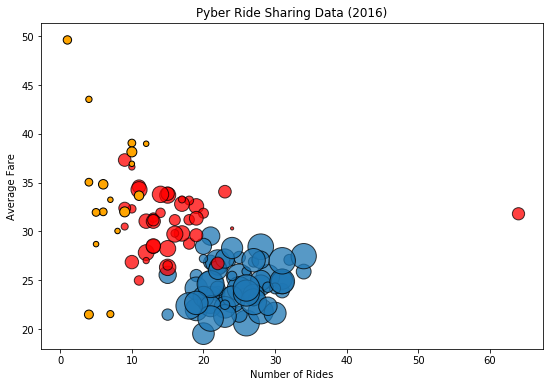

In [71]:
s=(urban_merge2['driver_count'])
ax = urban_merge2.plot(kind="scatter", x="ride_id", y="fare", s=s*10, Edgecolor="Black", alpha=".75", grid=True, figsize=(9,6))

s=(suburban_merge2['driver_count'])
suburban_merge2.plot(kind="scatter", x="ride_id", y="fare", s=s*10, Facecolors="red", Edgecolor="Black", alpha=".75", ax=ax)

s=(rural_merge2['driver_count'])
rural_merge2.plot(kind="scatter", x="ride_id", y="fare", s=s*10, Facecolors="orange", Edgecolor="Black", ax=ax)

# plt.xlim = ([0,100])
# plt.ylim = ([0,100])
plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Number of Rides')
plt.ylabel('Average Fare')
plt.show()

#grid=True, figsize=(10, 5)

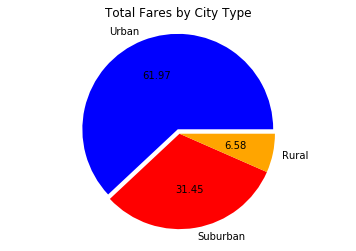

In [65]:
# Making the Py Charts

## % Total Fares by City Type

urban_fares_total = urban_data['fare'].sum()
# print(urban_fares_total)
suburban_fares_total = suburban_data['fare'].sum()
# print(suburban_fares_total)
rural_fares_total = rural_data['fare'].sum()
# print(rural_fares_total)


city_type_fare = ["Urban", "Suburban", "Rural"]
city_rides_fares = [urban_fares_total, suburban_fares_total, rural_fares_total]

colors = ["Blue", "Red", "Orange"]
explode = [0.05, 0, 0]

plt.pie(city_rides_fares, explode=explode, labels=city_type_fare, colors=colors, autopct='%.2f')


plt.axis("equal")
#plt.savefig("PyPies.png") 

plt.title("Total Fares by City Type")
plt.show()## % Total Fares by City Type



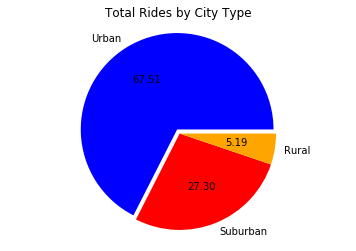

In [67]:
## % Total Rides by City Type

urban_rides_total = urban_data['ride_id'].count()
# print(urban_fares_total)
suburban_rides_total = suburban_data['ride_id'].count()
# print(suburban_fares_total)
rural_rides_total = rural_data['ride_id'].count()
# print(rural_fares_total)


city_type_rides = ["Urban", "Suburban", "Rural"]
city_rides_rides = [urban_rides_total, suburban_rides_total, rural_rides_total]

colors = ["Blue", "Red", "Orange"]
explode = [0.05, 0, 0]

plt.pie(city_rides_rides, explode=explode, labels=city_type_fare, colors=colors, autopct='%.2f')

plt.axis("equal")
#plt.savefig("PyPies.png")
plt.title("Total Rides by City Type")
plt.show()

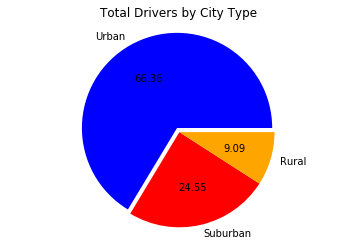

In [74]:
## % Total Drivers by City Type

urban_drivers_total = urban_data['driver_count'].max()
# print(urban_fares_total)
suburban_drivers_total = suburban_data['driver_count'].max()
# print(suburban_fares_total)
rural_drivers_total = rural_data['driver_count'].max()
# print(rural_fares_total)


city_type_drivers = ["Urban", "Suburban", "Rural"]
city_rides_drivers = [urban_drivers_total, suburban_drivers_total, rural_drivers_total]

colors = ["Blue", "Red", "Orange"]
explode = [0.05, 0, 0]

plt.pie(city_rides_drivers, explode=explode, labels=city_type_fare, colors=colors, autopct='%.2f')

plt.axis("equal")
#plt.savefig("PyPies.png")
plt.title("Total Drivers by City Type")
plt.show()